# Predicting breast cancer from digitized images of breast mass
by Rebecca Sokol-Snyder, William Song, and Chung Ki (Harry) Yau 2025/11/22## Analysis
In this section, we analyze the counts of binary features in parks based on the presence of washrooms to identify patterns in park amenities. The following code present the count of existing binary features for parks with and without washrooms. The results shows that parks with washrooms tend to have higher counts of other amenities compared to those without washrooms. 

Moreover, a bar chart is used to visualize the numeric features based on the presence of washrooms in parks. Which result a significant difference in the hectare size of a park when washrooms are present or not. The parks with washrooms tend to be larger in size compared to those without washrooms. In addition, categorical features are also visualized using bar charts to show the distribution of different categories based on the presence of washrooms in parks. We can observe the majority of the neighborhoods area tends to have less washrooms in parks.

The next step, 3 models were used to predict the presence of washrooms in parks based on the binary, numeric and categorical features. The models used were KNN, SVC with RBF kernal and Dummy classification. The performance of each model was evaluated using cross validation score. The results indicate that the SVC with RBF kernal model had a better performance than the other two models in predicting the presence of washrooms in parks.

## Discussion
The analysis reveals that parks equipped with washrooms generally offer a wider range of amenities and larger hectare compared to those without washrooms. This suggests that parks with washrooms may be designed to accommodate more visitors and provide a more comprehensive recreational experience. The presence of washrooms could be an indicator of a park's overall quality and the level of services it provides to the public.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# read data
park = pd.read_csv("data/parks.csv", sep=";")
park

,ParkID,Name,Official,Advisories,SpecialFeatures,Facilities,Washrooms,StreetNumber,StreetName,EWStreet,NSStreet,NeighbourhoodName,NeighbourhoodURL,Hectare,GoogleMapDest
0,2,Carnarvon Park,1,N,N,Y,Y,2995,W 19th Avenue,W 19th Avenue,Mackenzie Street,Arbutus-Ridge,https://vancouver.ca/news-calendar/arbutus-rid...,3.79,"49.256555, -123.171406"
1,13,Coal Harbour Park,1,N,N,Y,N,480,Broughton Street,W Hastings Street,Broughton Street,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,0.95,"49.289981, -123.125015"
2,16,David Lam Park,1,N,Y,Y,Y,1300,Pacific Boulevard,Drake Street,Pacific Boulevard,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,4.34,"49.272569, -123.124145"
3,25,May & Lorne Brown Park,1,N,N,N,N,801,Beach Avenue,Beach Avenue,Hornby Street,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,0.25,"49.275188, -123.132046"
4,26,Pioneer Place (Pigeon Park),1,N,N,N,N,399,Carrall Street,W Hastings Street,Carrall Street,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,0.03,"49.281699, -123.104588"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,235,Granville Island Water Park,0,N,N,Y,N,1348,Cartwright Street,NaN,NaN,Fairview,https://vancouver.ca/news-calendar/fairview.aspx,0.00,"49.26955, -123.135064"
214,237,Yaletown Park,1,N,N,N,N,901,Mainland Street,Mainland Street,Nelson Street,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,0.17,"49.277042, -123.118921"
215,238,Carolina Park,1,N,N,N,N,2100,Carolina Street,E 5th Avenue,Carolina Street,Mount Pleasant,https://vancouver.ca/news-calendar/mount-pleas...,0.08,"49.266401, -123.090778"
216,241,Habitat Island,0,N,N,N,N,1616,Columbia Street,NaN,NaN,Mount Pleasant,https://vancouver.ca/news-calendar/mount-pleas...,0.60,"49.27221, -123.110791"


In [8]:
# Summary of dataframe
park.describe()

,ParkID,Official,StreetNumber,Hectare
count,218.000000,218.000000,218.000000,218.000000
mean,119.908257,0.917431,2841.137615,6.200459
std,70.243689,0.275863,2128.224454,28.690242
min,1.000000,0.000000,50.000000,0.000000
25%,61.250000,1.000000,1177.250000,0.455000
50%,117.500000,1.000000,2390.000000,1.400000
75%,178.500000,1.000000,3930.750000,3.812500
max,249.000000,1.000000,9250.000000,400.000000


In [9]:
# listing features in dataframe
numeric_features = ['Hectare']
categorical_features = ['NeighbourhoodName']
binary_features = ['Official', 'Advisories', 'SpecialFeatures', 'Facilities']
drop_features = ['NeighbourhoodURL', 'ParkID', 'Name', 'GoogleMapDest', 'StreetNumber', 'StreetName', 'EWStreet', 'NSStreet']
target = "Washrooms"

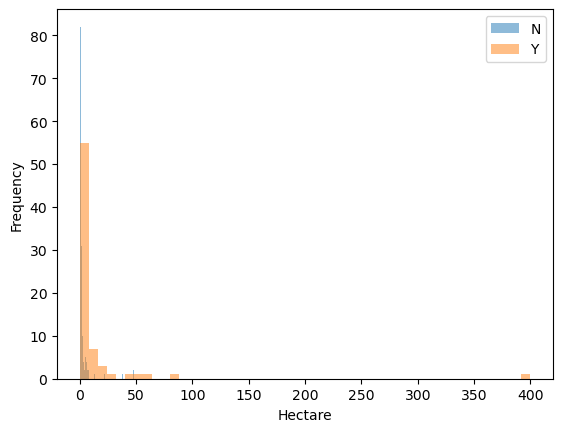

In [10]:
# Visualize numeric features
for col in numeric_features:
    park.groupby(target)[col].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(col);
    plt.show()

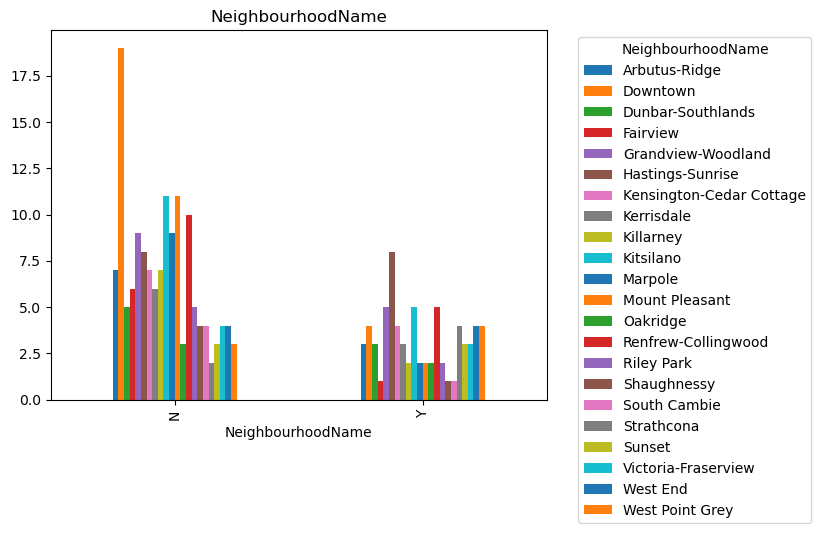

In [26]:
# Visualize categorical features
cat_df = park[[col, target]].copy()
cat_df_count = cat_df.groupby([target, col]).size().unstack()
cat_df_count.plot.bar()
plt.title(col);
plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xlabel(col);
plt.show()


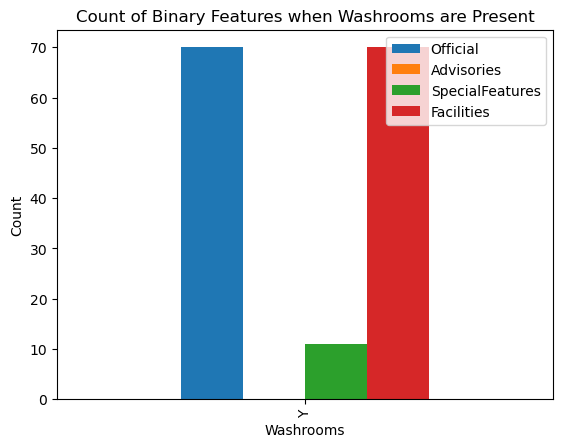

In [11]:
# Visualize binary features when there is washroom
binary_df = park[binary_features + [target]].copy()
binary_df['Official'] = binary_df['Official'].astype(str).replace({"1": "Y", "0": "N"})
washroom_df = binary_df[binary_df[target] == "Y"]
washroom_df_count = washroom_df.groupby(target)[binary_features].apply(lambda group: (group == "Y").sum())
washroom_df_count
washroom_df_count.plot.bar()
plt.title("Count of Binary Features when Washrooms are Present")
plt.ylabel("Count")
plt.show()

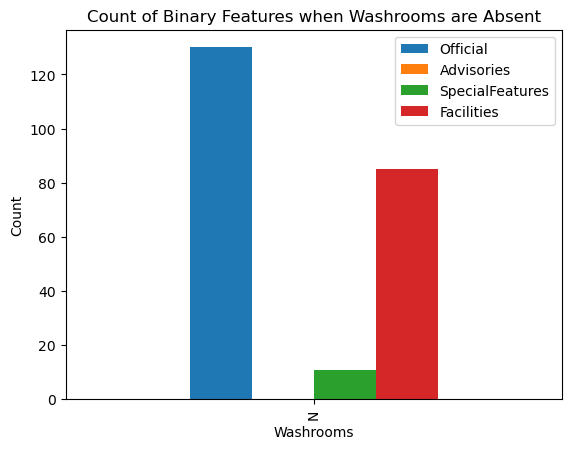

In [12]:
# Visualize binary features when there is no washroom
no_washroom_df = binary_df[binary_df[target] == "N"]
no_washroom_df_count = no_washroom_df.groupby(target)[binary_features].apply(lambda group: (group == "Y").sum())
no_washroom_df_count
no_washroom_df_count.plot.bar()
plt.title("Count of Binary Features when Washrooms are Absent")
plt.ylabel("Count")
plt.show()

In [13]:
# preprocessor for column transformation
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"), OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)
preprocessor = make_column_transformer(
(StandardScaler(), numeric_features),
(OneHotEncoder(), binary_features),
(categorical_transformer, categorical_features),
("drop", drop_features)
)

In [14]:
# train and test data set up
train_df = train_test_split(park, test_size=0.6, random_state=123)[0]
test_df = train_test_split(park, test_size=0.6, random_state=123)[1]
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]
y_test

204    Y
203    N
31     N
186    Y
169    N
      ..
199    N
179    N
200    Y
87     N
9      Y
Name: Washrooms, Length: 131, dtype: object

In [15]:
# Function for cv score, adapted from 571 lab 2
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    Parameters
    ----------
    model :
    scikit-learn model
    X_train : numpy array or pandas DataFrame
    X in the training data
    y_train :
    y in the training data
    Returns
    ----------
    pandas Series with mean scores from cross_validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)
    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []
    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))
    return pd.Series(data=out_col, index=mean_scores.index)

In [16]:
# Setup model and pipline
model = DummyClassifier(random_state=123)
pipe = make_pipeline(preprocessor, model)

In [17]:
dummy_df = pd.DataFrame({
    "dummy" : mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
})
dummy_df.transpose()

,fit_time,score_time,test_score,train_score
dummy,0.005 (+/- 0.001),0.003 (+/- 0.000),0.748 (+/- 0.023),0.747 (+/- 0.006)


In [18]:
# RBF SVC model implementation
svm_rbf_classifier = SVC(kernel='rbf', C=1.0, gamma='scale') 
pipe2 = make_pipeline(preprocessor, svm_rbf_classifier)
svm_rbf_df = pd.DataFrame({
    "svm_rbf" : mean_std_cross_val_scores(pipe2, X_train, y_train, cv=5, return_train_score=True)
})
svm_rbf_df.transpose()

,fit_time,score_time,test_score,train_score
svm_rbf,0.005 (+/- 0.001),0.003 (+/- 0.001),0.771 (+/- 0.051),0.807 (+/- 0.022)


In [19]:
# knn model implementation
knn_classifier = KNeighborsClassifier(n_neighbors=5)
pipe3 = make_pipeline(preprocessor, knn_classifier)
knn_df = pd.DataFrame({
    "knn" : mean_std_cross_val_scores(pipe3, X_train, y_train, cv=5, return_train_score=True)
})
knn_df.transpose()

,fit_time,score_time,test_score,train_score
knn,0.005 (+/- 0.002),0.009 (+/- 0.016),0.746 (+/- 0.058),0.833 (+/- 0.019)


In [20]:
result = pd.merge(dummy_df, svm_rbf_df, left_index=True, right_index=True)
result = pd.merge(result, knn_df, left_index=True, right_index=True)
result

,dummy,svm_rbf,knn
fit_time,0.005 (+/- 0.001),0.005 (+/- 0.001),0.005 (+/- 0.002)
score_time,0.003 (+/- 0.000),0.003 (+/- 0.001),0.009 (+/- 0.016)
test_score,0.748 (+/- 0.023),0.771 (+/- 0.051),0.746 (+/- 0.058)
train_score,0.747 (+/- 0.006),0.807 (+/- 0.022),0.833 (+/- 0.019)
